<a href="https://colab.research.google.com/github/iqraiqbal4142/Ai_Note_book/blob/main/Regression_in_DL_with_TensorFlow%60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iqra.iqbal4142@gmail.com

# Regression in DL with TensorFlow


In [ ]:
#import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Epoch 1/100
413/413 [==============================] - 3s 4ms/step - loss: 0.9363 - val_loss: 0.5174
Epoch 2/100
413/413 [==============================] - 2s 4ms/step - loss: 0.4153 - val_loss: 0.4167
Epoch 3/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3755 - val_loss: 0.3918
Epoch 4/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3563 - val_loss: 0.3861
Epoch 5/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3503 - val_loss: 0.3656
Epoch 6/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3380 - val_loss: 0.3578
Epoch 7/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3236 - val_loss: 0.3448
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3265 - val_loss: 0.3459
Epoch 9/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3126 - val_loss: 0.3377
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3016 - val_lo

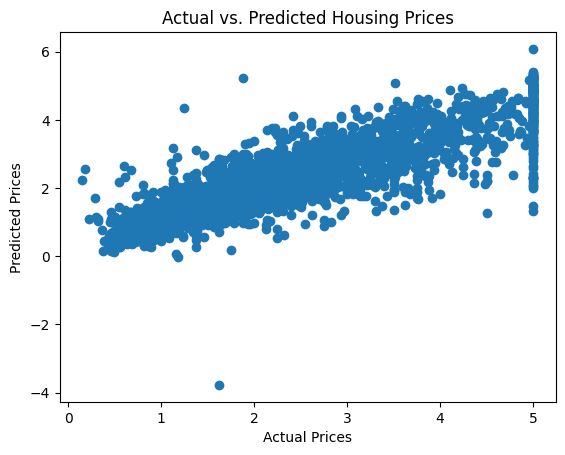

In [ ]:


# Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (housing prices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output unit for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss:.4f}')

# Make predictions
predictions = model.predict(X_test)

# Visualize the results (plot actual vs. predicted prices)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.show()
